# Ecuaciones de una variable

### 1. ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

1.a. El area de un segmento circular se puede expresar de la siguiente forma.

$$A = A_c - A_t$$

Donde A es el area del circulo, el cual segun el problema es un cuarto, por tanto se tiene que:

$$A = \frac{\pi R^2}{4}$$

Se tiene tambien que $A_c$ es el area del segmento circular, del cual se conoce que es igual a: $\frac{\theta R^2}{2}$. Y $A_t$ es el area del triangulo formado al trazar una recta en los puntos de interseccion limites del angulo, y conociendo la formula del area del trangulo se tiene que: $A_t = \frac{Base * Altura}{2}$.

Entonces, con el uso de la trigonometria se tiene que, para el angulo = $\frac{\theta}{2}$, la base es igual a: $R \sin(\frac{\theta}{2})̡$ y la altura es igual a: $R \cos(\frac{\theta}{2})$. Ahora, para el angulo completo nos resulta en la siguiente ecuacion:

$$A_t = \frac{R^2 \sin(\theta)̡}{2}$$

Ahora, reordenando todas las partes de la ecuacion 1 y operando, se tiene que:

\begin{equation}
\frac{\pi R^2}{4} = \frac{\theta R^2}{2} - \frac{R^2 \sin(\theta)̡}{2} \longleftrightarrow \theta - \sin(\theta) = \frac{\pi}{2}
\end{equation}


1.b Construccion de la grafica para theta

In [ ]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

In [ ]:
#Inicializacion de variables

N = 100
i = 0
theta_inicial = 0
theta_final = 2 * np.pi

f_theta = []
fun0 = np.zeros(N)
fun = np.zeros(N)

In [ ]:
#Creacion de dataframe e intersecion de curvas

def funcion (theta):
  for i in range(0,N):
    f_theta.append(theta[i] - np.sin(theta[i]) - np.pi/2)
    i = i+1
  return f_theta

theta = np.linspace(theta_inicial, theta_final, N)
dataframe = pd.DataFrame({'theta':theta, 'funcion':funcion(theta)})
fun = dataframe.funcion.array
inter = np.int(np.argwhere(np.diff(np.sign(fun) - fun0)).flatten())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


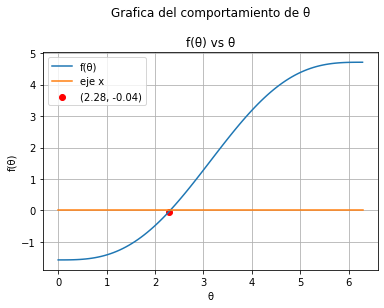

In [ ]:
#Creacion de grafica

plt.plot(dataframe.theta, dataframe.funcion)
plt.plot([theta_inicial, theta_final] , [0,0])
plt.scatter(dataframe.theta[inter], fun[inter],color='red')

plt.xlabel('θ')
plt.ylabel('f(θ)')
plt.title('''Grafica del comportamiento de θ

f(θ) vs θ''')
plt.legend(['f(θ)', 'eje x', (round(dataframe.theta[inter],2), round(fun[inter],2))])
plt.grid()

1.c Metodo de biseccion, punto fijo, newton y secante.

In [ ]:
#funciones
fun = lambda theta: theta - np.sin(theta) - np.pi/2
d_fun = lambda theta: 1 - np.cos(theta)
g_fun = lambda theta: theta - fun(theta)

#Biseccion
bisec = optimize.bisect(fun, 0, 6)

#Punto fijo
p_fijo = optimize.fixed_point(g_fun, 0)

#Newton
newt = optimize.newton(fun, 6, fprime=d_fun)

#Secante
sec = optimize.newton(fun, 0)


print(r'Metodo de biseccion=   %.4f'%bisec)
print(r'Metodo del punto fijo= %.4f'%p_fijo)
print(r'Metodo de Newton=      %.4f'%newt)
print(r'Metodo de la secante=  %.4f'%sec)


Metodo de biseccion=   2.3099
Metodo del punto fijo= 2.3099
Metodo de Newton=      2.3099
Metodo de la secante=  2.3099


### 2.

In [ ]:
#Variables iniciales
g = 32.17
s0 = 300
m = 0.25
k = 0.1

In [ ]:
#Funciones
altura = lambda t: s0 - ((m*g)/k)*t - m*((m*g)/(k**2))*(1 - np.exp(-((k*t)/m)))
d_altura = lambda t: -(g*m + np.exp(-(k*t)/m)*(g*m))/k
g_altura = lambda t: t - altura(t)

#Biseccion
bisec_eq = optimize.bisect(altura, 0, 5)

#Punto fijo
p_fijo_eq = optimize.fixed_point(g_altura, 2)

#Newton
newt_eq = optimize.newton(altura, 0, fprime=d_altura)

#Secante
sec_eq = optimize.newton(altura, 0)

print(r'Metodo de biseccion=   %.4f'%bisec_eq)
print(r'Metodo del punto fijo= %.4f'%p_fijo_eq)
print(r'Metodo de Newton=      %.4f'%newt_eq)
print(r'Metodo de la secante=  %.4f'%sec_eq)

Metodo de biseccion=   2.2476
Metodo del punto fijo= 2.2476
Metodo de Newton=      2.2476
Metodo de la secante=  2.2476


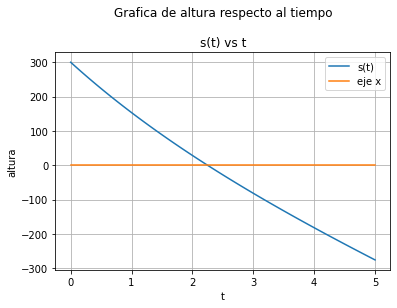

In [ ]:
#Creacion de grafica
t = np.linspace(0,5,N)
plt.plot(t,altura(t))
plt.plot([0,5],[0,0])

plt.xlabel('t')
plt.ylabel('altura')
plt.title('''Grafica de altura respecto al tiempo

s(t) vs t''')
plt.legend(['s(t)', 'eje x'])

plt.grid()

###3. En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético puede ser calculada como:
\begin{equation}
m(T)=\tanh(\frac{m(T)}{t})
\end{equation}
###donde m y T son la magnetizacion y temperatura reducida respectivamente

In [ ]:
T = 0.5
magnet = lambda m: np.tanh(m/T) - m
g_magnet =lambda m: m - magnet(m)

#3.a Secante
sec_equa = optimize.newton(magnet, 5)
print(r'Valor obtenido con el metodo de la secante: %.4f '%sec_equa)

#3.b Punto fijo
p_fijo_equa = optimize.fixed_point(g_magnet, 5)
print(r'Valor obtenido con el metodo del punto fijo: %.4f '%p_fijo_equa)

Valor obtenido con el metodo de la secante: 0.9575 
Valor obtenido con el metodo del punto fijo: 0.9575 


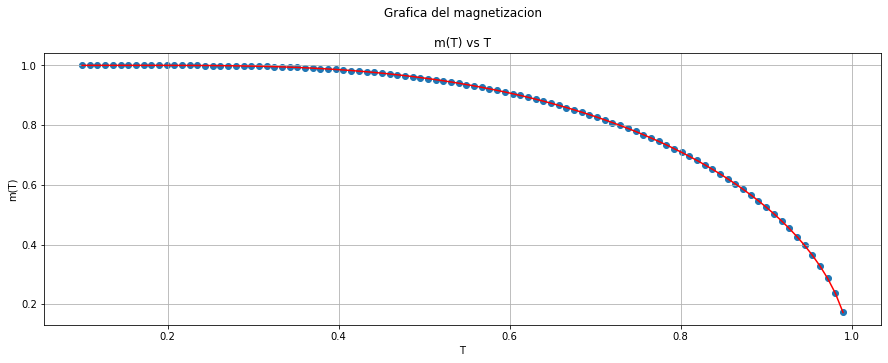

In [ ]:
from numpy.ma.core import size
# 3.d Grafica
Tp = np.linspace(0.1,0.99,100)
sec_grafic = []

for i in (Tp):
  T = i
  sec_grafic.append(optimize.newton(magnet, 5))

plt.figure(figsize=(15,5))
plt.plot(Tp,sec_grafic, color='r')
plt.scatter(Tp,sec_grafic)
plt.xlabel('T')
plt.ylabel('m(T)')
plt.title('''Grafica del magnetizacion

m(T) vs T''')
plt.grid()

###5. Construir un fractal empleando el metodo de Newton-Raphson.


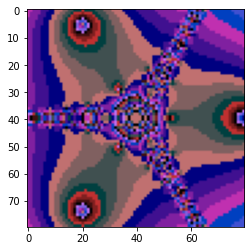

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)